In [1]:
import os
os.environ["PYSPARK_PYTHON"] = "python"

In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import pyspark.sql.functions as F
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



In [3]:
# Create Spark session
spark = SparkSession.builder.appName("LR-pyspark").getOrCreate()

In [4]:
data = [
    (3.5,5.8),
    (6.7,9.7),
    (9.8,11.2),
    (14.12,16.8),
    (19.0,25.0)
]

In [6]:
df = spark.createDataFrame(data,schema=["x", "y"])
df.show()

+-----+----+
|    x|   y|
+-----+----+
|  3.5| 5.8|
|  6.7| 9.7|
|  9.8|11.2|
|14.12|16.8|
| 19.0|25.0|
+-----+----+



In [7]:
assembler = VectorAssembler(inputCols=["x"], outputCol="features")
df_features = assembler.transform(df).select("features", "x", "y")

In [8]:
df_features.show()

+--------+-----+----+
|features|    x|   y|
+--------+-----+----+
|   [3.5]|  3.5| 5.8|
|   [6.7]|  6.7| 9.7|
|   [9.8]|  9.8|11.2|
| [14.12]|14.12|16.8|
|  [19.0]| 19.0|25.0|
+--------+-----+----+



In [9]:
lr = LinearRegression(featuresCol="features", labelCol="y")
model = lr.fit(df_features)

In [10]:
intercept = model.intercept
print(intercept)

0.9175227629277343


In [11]:
slope = float(model.coefficients[0])
print(slope)

1.2031699206581576


In [12]:
r2 = model.summary.r2
print(r2)

0.9731279081654046


In [13]:
pred = model.transform(df_features)\
    .withColumnRenamed("prediction","y_hat")\
        .withColumn("residual", F.col("y") - F.col("y_hat"))

In [14]:
pred.select("x", "y", "y_hat", "residual").show()

+-----+----+-----------------+-------------------+
|    x|   y|            y_hat|           residual|
+-----+----+-----------------+-------------------+
|  3.5| 5.8|5.128617485231286| 0.6713825147687142|
|  6.7| 9.7| 8.97876123133739| 0.7212387686626087|
|  9.8|11.2|12.70858798537768|-1.5085879853776802|
|14.12|16.8|17.90628204262092|-1.1062820426209186|
| 19.0|25.0|23.77775125543273| 1.2222487445672705|
+-----+----+-----------------+-------------------+



In [17]:
pdf = pred.select("x", "y", "y_hat", "residual").toPandas()


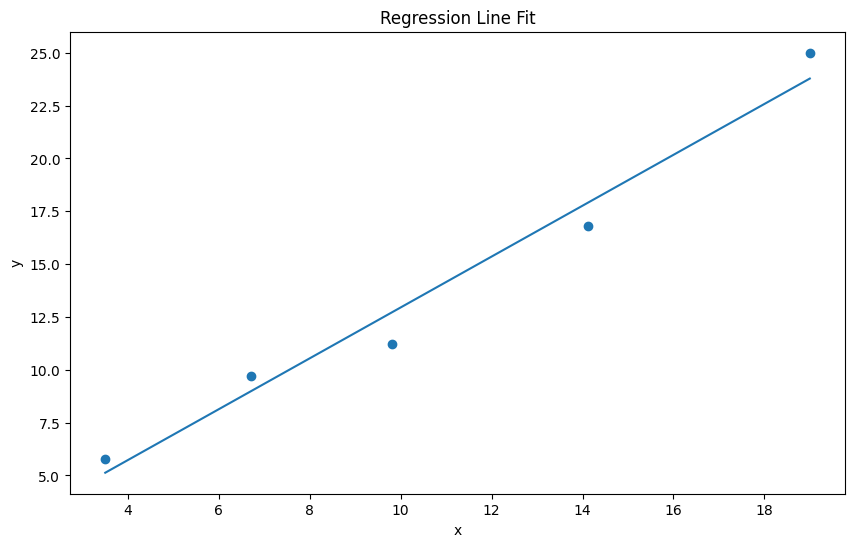

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Extract values
x_vals = pdf["x"].values
y_vals = pdf["y"].values

# Create line for regression
x_line = np.linspace(x_vals.min(), x_vals.max(), 200)
y_line = intercept + slope * x_line

# Plot
plt.figure(figsize=(10,6))
plt.scatter(x_vals, y_vals)      # scatter of actual data
plt.plot(x_line, y_line)         # regression line
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression Line Fit")
plt.show()
